# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [3]:
df = pd.read_csv('diabetes.csv')

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [8]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [10]:
df.drop(['Pregnancies'], axis=1, inplace=True)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [12]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


(768, 8)

Step 5 - Write code to clean data

check if any null values

In [14]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(768, 8)

check how many 0's in skinthickness

In [20]:
(df['SkinThickness'] == 0).sum()

227

fill in those with the mean of column

In [22]:
mean_value = df[df['SkinThickness'] != 0]['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].replace(0, mean_value)

Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [36]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
inputs = X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train) / len(inputs))
print(len(X_test) / len(inputs))



0.7994791666666666
0.20052083333333334


In [38]:
df.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35.000,0,33.600,0.627,50,1
1,85,66,29.000,0,26.600,0.351,31,0
2,183,64,29.153,0,23.300,0.672,32,1
3,89,66,23.000,94,28.100,0.167,21,0
4,137,40,35.000,168,43.100,2.288,33,1


#### **Step #7: Initialize your model**




In [40]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
model.fit(X_train, y_train)

Step 9 - Predict using model on test data

In [42]:
pred = np.array(model.predict(X_test))
pred_probability = np.array(model.predict_proba(X_test)) # calculating the probabilities

print(pred[:5])
for i in range(1, 6):
    print(pred_probability[i][0], end=", ")

[1 0 0 0 0]
0.7155004602083225, 0.8091219230065567, 0.8838896620721207, 0.8563719519428048, 0.8368958188912815, 

Step 10 -  Find accuracy of model

In [44]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


Step 11 - Confusion Matrix

[[92 16]
 [23 23]]


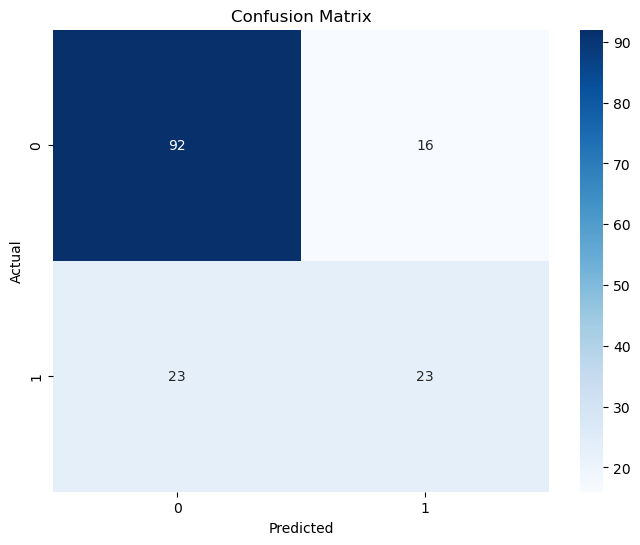

In [46]:
cm = confusion_matrix(y_test, pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()